In [21]:
# Install Requied Libraries and Noto Sans CJK font
!pip install requests
!apt-get install -y fonts-noto-cjk

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-noto-cjk is already the newest version (1:20220127+repack1-1).
0 upgraded, 0 newly installed, 0 to remove and 45 not upgraded.


In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import font_manager
from PIL import Image
import numpy as np
import os
import zipfile
import requests

In [46]:
# Load the dataset
data_path = 'https://raw.githubusercontent.com/Jessyjy7/CSE151A_Project/main/chinese_mnist.csv'
data = pd.read_csv(data_path)

# Download the zip file
zip_url = 'https://raw.githubusercontent.com/Jessyjy7/CSE151A_Project/main/data.zip'
zip_path = 'data.zip'
response = requests.get(zip_url)
with open(zip_path, 'wb') as file:
    file.write(response.content)

# Extract the zip file
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall('data')

# Verify extracted files
for root, dirs, files in os.walk('data'):
    print(root, dirs, files[:10])  # Print the first 10 files to check the naming convention

data ['data'] []
data/data [] ['input_74_6_11.jpg', 'input_55_10_10.jpg', 'input_83_7_2.jpg', 'input_72_6_1.jpg', 'input_87_9_1.jpg', 'input_7_10_5.jpg', 'input_19_9_2.jpg', 'input_99_5_14.jpg', 'input_85_5_9.jpg', 'input_96_4_5.jpg']


In [35]:
# Display the first few rows
print(data.head())

# Data Summary
print(f"Number of samples: {len(data)}")
print(f"Number of features: {data.shape[1]}")
print("Missing values per column:\n", data.isnull().sum())

# Column descriptions
print(data.columns)

   suite_id  sample_id  code  value character
0         1          1    10      9         九
1         1         10    10      9         九
2         1          2    10      9         九
3         1          3    10      9         九
4         1          4    10      9         九
Number of samples: 15000
Number of features: 5
Missing values per column:
 suite_id     0
sample_id    0
code         0
value        0
character    0
dtype: int64
Index(['suite_id', 'sample_id', 'code', 'value', 'character'], dtype='object')


['/usr/share/fonts/opentype/noto/NotoSansCJK-Bold.ttc', '/usr/share/fonts/opentype/noto/NotoSansCJK-Regular.ttc']


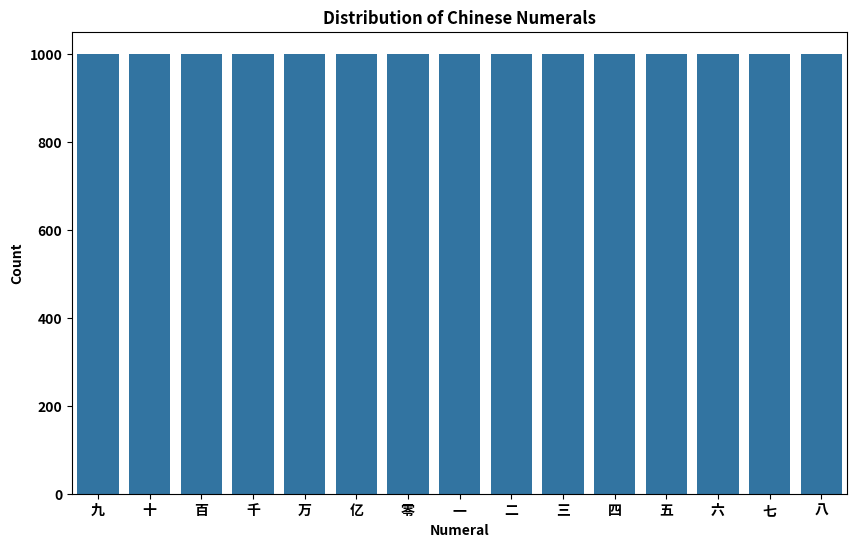

In [36]:
# List all available fonts and find Noto Sans CJK
font_paths = font_manager.findSystemFonts(fontpaths=['/usr/share/fonts/truetype/noto', '/usr/share/fonts/opentype/noto'])

noto_sans_cjk_fonts = [f for f in font_paths if 'NotoSansCJK' in f]
print(noto_sans_cjk_fonts)

# Assuming the first match is correct
if noto_sans_cjk_fonts:
    font_path = noto_sans_cjk_fonts[0]
    font_manager.fontManager.addfont(font_path)
    plt.rcParams['font.family'] = 'Noto Sans CJK JP'
else:
    print("Noto Sans CJK font not found.")


# Visualize the distribution of the numerals
plt.figure(figsize=(10, 6))
sns.countplot(x='character', data=data)
plt.title('Distribution of Chinese Numerals')
plt.xlabel('Numeral')
plt.ylabel('Count')
plt.show()


['input_74_6_11.jpg', 'input_55_10_10.jpg', 'input_83_7_2.jpg', 'input_72_6_1.jpg', 'input_87_9_1.jpg', 'input_7_10_5.jpg', 'input_19_9_2.jpg', 'input_99_5_14.jpg', 'input_85_5_9.jpg', 'input_96_4_5.jpg']
data/data/input_1_1_10.jpg True
data/data/input_1_10_10.jpg True
data/data/input_1_2_10.jpg True
data/data/input_1_3_10.jpg True
data/data/input_1_4_10.jpg True
data/data/input_1_5_10.jpg True
data/data/input_1_6_10.jpg True
data/data/input_1_7_10.jpg True
data/data/input_1_8_10.jpg True
data/data/input_1_9_10.jpg True


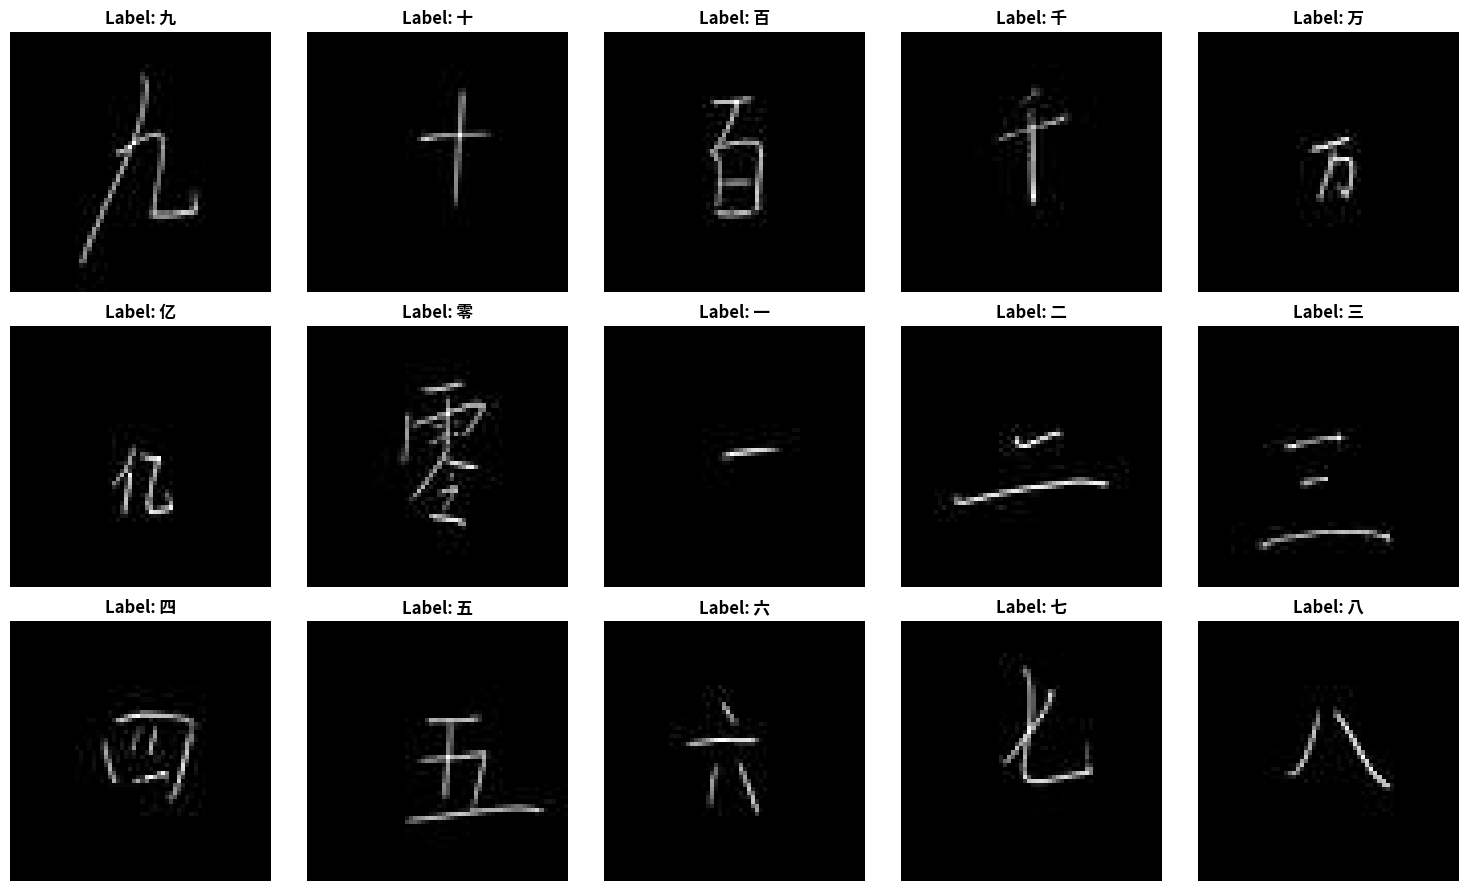

In [51]:
# Path to extracted images
img_dir = 'data/data'
files = os.listdir(img_dir)
print(files[:10])

# Debugging: Check if images exist
for i, row in data.iterrows():
    img_path = os.path.join(img_dir, f"input_{row['suite_id']}_{row['sample_id']}_{row['code']}.jpg")
    if i < 10:  # Print the first 10 paths
        print(img_path, os.path.exists(img_path))

# Plot some sample images from each numeral class
fig, axes = plt.subplots(3, 5, figsize=(15, 9))
axes = axes.flatten()
characters = data['character'].unique()

for i, ax in enumerate(axes):
    if i < len(characters):
        sample = data[data['character'] == characters[i]].sample(1).iloc[0]
        img_path = os.path.join(img_dir, f"input_{sample['suite_id']}_{sample['sample_id']}_{sample['code']}.jpg")
        if os.path.exists(img_path):
            img = Image.open(img_path)
            ax.imshow(img, cmap='gray')
            ax.set_title(f'Label: {sample["character"]}')
            ax.axis('off')
        else:
            ax.set_title(f'Missing: {sample["character"]}')
            ax.axis('off')

plt.tight_layout()
plt.savefig('sample_images.png')
plt.show()

In [58]:
# Analyze image dimensions and pixel values
img_sizes = []
pixel_values = []

for i, row in data.iterrows():
    img_path = os.path.join(img_dir, f"input_{row['suite_id']}_{row['sample_id']}_{row['code']}.jpg")
    if os.path.exists(img_path):
        img = Image.open(img_path)
        img_sizes.append(img.size)
        pixel_values.append(np.array(img).flatten())
    else:
        print(f"Image {img_path} not found")

pixel_values = np.array(pixel_values)
if len(img_sizes) > 0:
    print(f"Image dimensions (width x height): {img_sizes[0]}")
    uniform_size = all(size == img_sizes[0] for size in img_sizes)
    print(f"All images have uniform size: {uniform_size}")
if pixel_values.size > 0:
    print(f"Mean pixel value: {np.mean(pixel_values)}")
    print(f"Standard deviation of pixel values: {np.std(pixel_values)}")
else:
    print("No pixel values to analyze")

Image dimensions (width x height): (64, 64)
All images have uniform size: True
Mean pixel value: 2.200134130859375
Standard deviation of pixel values: 13.892305277482373


In [60]:
# Determine if cropping or normalization is needed
if not uniform_size:
    print("Images need to be cropped or resized to a uniform size.")
else:
    print("Images are already of uniform size.")

# Normalize images to [0, 1] range
normalized_pixel_values = pixel_values / 255.0
print(f"Mean normalized pixel value: {np.mean(normalized_pixel_values)}")
print(f"Standard deviation of normalized pixel values: {np.std(normalized_pixel_values)}")

Images are already of uniform size.
Mean normalized pixel value: 0.008627976983762248
Standard deviation of normalized pixel values: 0.054479628539146556


In [61]:
# Check label distribution
label_counts = data['character'].value_counts()
print("Label distribution:\n", label_counts)

Label distribution:
 character
九    1000
十    1000
百    1000
千    1000
万    1000
亿    1000
零    1000
一    1000
二    1000
三    1000
四    1000
五    1000
六    1000
七    1000
八    1000
Name: count, dtype: int64


Missing Data:

There are no missing values in the dataset.

Column Descriptions:

1. suite_id: Identifier for the suite of samples
2. sample_id: Identifier for the individual sample
3. code: Code representing the character
4. value: Value associated with the character
5. character: The handwritten Chinese numeral